# <center> Down Jones <center>


![title3](./wall-street1.webp)


In [104]:
from autoscraper import AutoScraper


url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

wanted_dict = {
    
    'Closing value': ['39.29', '41.03'],
    'Change in points': ['10.83','1.74'],
    'Change in percent': ['38.05','4.43']
}

scraper = AutoScraper()
scraper.build(url=url, wanted_dict=wanted_dict)



# get results grouped per rule so we'll know which one to use 
fg = scraper.get_result_similar(url, grouped=True)

In [105]:
import pandas as pd
df4 = pd.DataFrame(fg)

In [106]:
df4

,rule_85yw,rule_pcbq,rule_r6um,rule_a5z3,rule_ikq7,rule_xqsk
0,39.29,39.29,10.83,10.83,38.05,38.05
1,41.03,41.03,1.74,1.74,4.43,4.43
2,37.58,37.58,−3.45,−3.45,−8.41,−8.41
3,39.39,39.39,1.81,1.81,4.82,4.82
4,41.56,41.56,2.17,2.17,5.51,5.51
...,...,...,...,...,...,...
131,"19,762.60","19,762.60","2,337.57","2,337.57",13.42,13.42
132,"24,719.22","24,719.22","4,956.62","4,956.62",25.08,25.08
133,"23,327.46","23,327.46","−1,391.76","−1,391.76",−5.63,−5.63
134,"28,538.44","28,538.44","5,210.98","5,210.98",22.34,22.34


In [108]:
df4 = df4.drop(["rule_pcbq","rule_a5z3","rule_xqsk"],axis =1)


In [109]:
df4.columns = ['Closing value','Change in points','Change in percent']

In [110]:
df4

,Closing value,Change in points,Change in percent
0,39.29,10.83,38.05
1,41.03,1.74,4.43
2,37.58,−3.45,−8.41
3,39.39,1.81,4.82
4,41.56,2.17,5.51
...,...,...,...
131,"19,762.60","2,337.57",13.42
132,"24,719.22","4,956.62",25.08
133,"23,327.46","−1,391.76",−5.63
134,"28,538.44","5,210.98",22.34


In [111]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Closing value      136 non-null    object
 1   Change in points   136 non-null    object
 2   Change in percent  136 non-null    object
dtypes: object(3)
memory usage: 3.3+ KB


In [112]:
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [113]:
df4["Closing value"] = df4["Closing value"].apply(process_num)

In [114]:
df4["Change in points"] = df4["Change in points"].apply(process_num)

In [115]:
df4["Change in percent"] = df4["Change in percent"].apply(process_num)

In [116]:
df4.insert(0,"Annee",[i for i in range(1885,2021)])

In [117]:
df4

,Annee,Closing value,Change in points,Change in percent
0,1885,39.29,10.83,38.05
1,1886,41.03,1.74,4.43
2,1887,37.58,3.45,8.41
3,1888,39.39,1.81,4.82
4,1889,41.56,2.17,5.51
...,...,...,...,...
131,2016,19762.60,2337.57,13.42
132,2017,24719.22,4956.62,25.08
133,2018,23327.46,1391.76,5.63
134,2019,28538.44,5210.98,22.34


In [118]:
df4.to_csv('trade5.csv')

<AxesSubplot:>

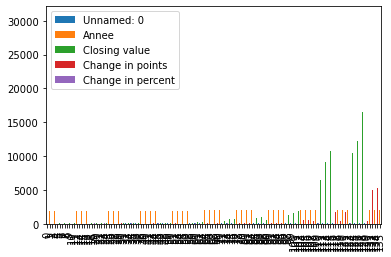

In [119]:
import pandas as pd
df4 = pd.read_csv('trade5.csv')
df4.plot.bar()

<AxesSubplot:>

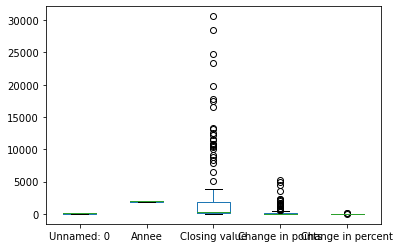

In [120]:
df4.plot.box()

In [121]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         136 non-null    int64  
 1   Annee              136 non-null    int64  
 2   Closing value      136 non-null    float64
 3   Change in points   136 non-null    float64
 4   Change in percent  136 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.4 KB
